## Data Exploration

#### Loading the given data into dataframe

In [277]:
import pandas as pd
brands_df = pd.read_json('C:/Users/vihar/Desktop/Interview/Data/brands.json',lines=True)
receipts_df = pd.read_json('C:/Users/vihar/Desktop/Interview/Data/receipts.json',lines=True)
users_df = pd.read_json('C:/Users/vihar/Desktop/Interview/Data/users.json',lines=True)
users_df

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


#### After parsing the data from .json format, few of the columns are in dictioary format and the date fields needs to be converted into readable date format. Below are few data manipulation steps in order to address these issues for users data.

In [64]:
Bvalue = {'$date': 0}
users_df['lastLogin']=users_df['lastLogin'].apply(lambda x: x if x == x else Bvalue)

df1 = users_df['_id'].apply(lambda x: pd.Series(*x.items()))
df1.columns = ['oid', 'id']

df2 = users_df['createdDate'].apply(lambda x: pd.Series(*x.items()))
df2.columns = ['date1', 'createdDate1']

df3 = users_df['lastLogin'].apply(lambda x: pd.Series(*x.items()))
df3.columns = ['date2', 'lastLogin1']

users_df1 = pd.concat([users_df,df1,df2,df3],axis=1)

users_df1.drop(['_id','createdDate','lastLogin','oid','date1','date2'],axis=1,inplace=True)

In [67]:
import datetime

for i in range((len(users_df1))):
               temp='/Date('+str(users_df1['createdDate1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               users_df1['createdDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
            
for i in range((len(users_df1))):
               temp='/Date('+str(users_df1['lastLogin1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               users_df1['lastLogin1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')

<ipython-input-67-33fc97bace52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df1['createdDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
C:\Users\vihar\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-67-33fc97bace52>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users

In [279]:
users_df1

,active,role,signUpSource,state,id,createdDate1,lastLogin1
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03,2021-01-03
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03,2021-01-03
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03,2021-01-03
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03,2021-01-03
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03,2021-01-03
...,...,...,...,...,...,...,...
490,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19,2021-03-05
491,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19,2021-03-05
492,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19,2021-03-05
493,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19,2021-03-05


In [295]:
users_df1.isnull().sum()

active           0
role             0
signUpSource    48
state           56
id               0
createdDate1     0
lastLogin1       0
dtype: int64

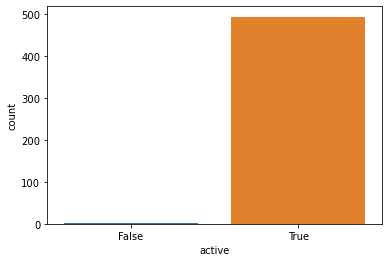

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x="active", data=users_df1)

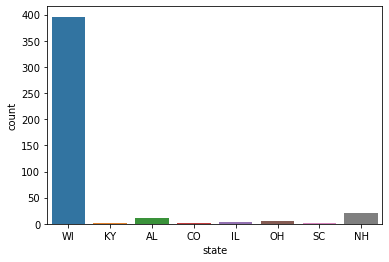

In [284]:
ax = sns.countplot(x="state", data=users_df1)

#### User data has no null values in most of the important fields. 

Above distribution from data shows that most of the users are from WISCONSIN compared to any other states in the dataset. There are 56 users for which State data is not captured, even though users from WISCONSIN are high in number.

In [285]:
brands_df

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


#### Below data manipulation steps are performed on brands data to make it more structured

In [111]:
bdf1 = brands_df['_id'].apply(lambda x: pd.Series(*x.items()))
bdf1.columns = ['oid', 'id']

In [286]:
# Breaking 'cpg' column into 2 columns - id and ref

bddf2 = brands_df['cpg'].apply(pd.Series)
bddf2

,$id,$ref
0,{'$oid': '601ac114be37ce2ead437550'},Cogs
1,{'$oid': '5332f5fbe4b03c9a25efd0ba'},Cogs
2,{'$oid': '601ac142be37ce2ead437559'},Cogs
3,{'$oid': '601ac142be37ce2ead437559'},Cogs
4,{'$oid': '5332fa12e4b03c9a25efd1e7'},Cogs
...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90bf'},Cogs
1163,{'$oid': '53e10d6368abd3c7065097cc'},Cogs
1164,{'$oid': '5332fa12e4b03c9a25efd1e7'},Cogs
1165,{'$oid': '5332f5f6e4b03c9a25efd0b4'},Cogs


In [114]:
bddf3 = bddf2['$id'].apply(pd.Series)
bddf3

,$oid
0,601ac114be37ce2ead437550
1,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead437559
3,601ac142be37ce2ead437559
4,5332fa12e4b03c9a25efd1e7
...,...
1162,5f77274dbe37ce6b592e90bf
1163,53e10d6368abd3c7065097cc
1164,5332fa12e4b03c9a25efd1e7
1165,5332f5f6e4b03c9a25efd0b4


In [118]:
brands_df1 = pd.concat([brands_df,bdf1,bddf2,bddf3],axis=1)
brands_df1.drop(['oid','_id','$id','cpg'],axis=1,inplace=True)
brands_df1['cpg_oid']= brands_df1['$oid']
brands_df1.drop(['$oid'],axis=1,inplace=True)
brands_df1

,barcode,category,categoryCode,name,topBrand,brandCode,id,$ref,cpg_oid
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac115be37ce2ead437551,Cogs,601ac114be37ce2ead437550
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,Cogs,5332f5fbe4b03c9a25efd0ba
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,Cogs,601ac142be37ce2ead437559
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,Cogs,601ac142be37ce2ead437559
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,NaN,5f77274dbe37ce6b592e90c0,Cogs,5f77274dbe37ce6b592e90bf
1163,511111706328,Breakfast & Cereal,NaN,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,5dc1fca91dda2c0ad7da64ae,Cogs,53e10d6368abd3c7065097cc
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5f494c6e04db711dd8fe87e7,Cogs,5332fa12e4b03c9a25efd1e7
1165,511111400608,Grocery,NaN,LIPTON TEA Leaves,0.0,LIPTON TEA Leaves,5a021611e4b00efe02b02a57,Cogs,5332f5f6e4b03c9a25efd0b4


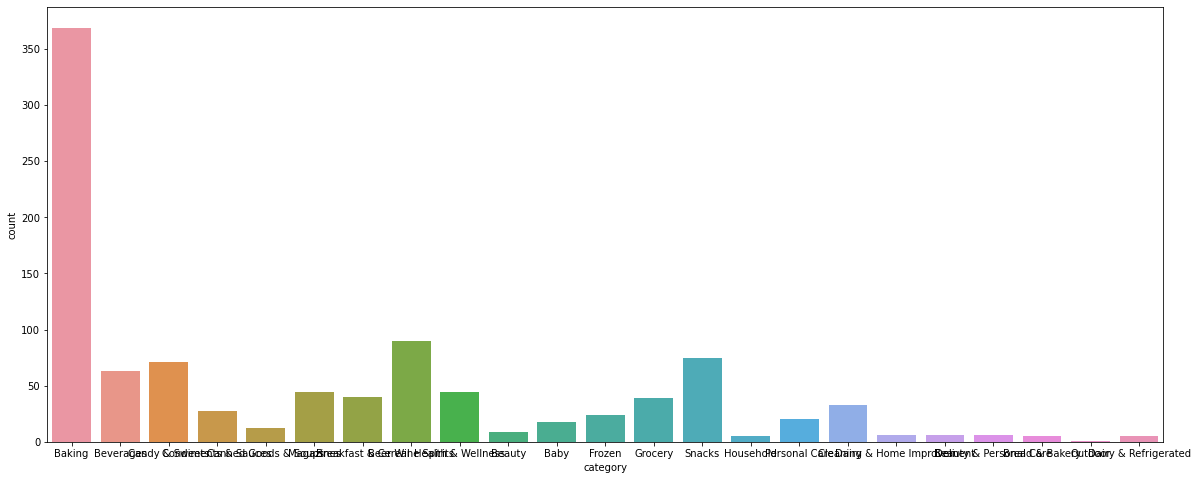

In [293]:
plt.figure(figsize=(20,8))
sns.countplot(x='category', data=brands_df1)

In [294]:
brands_df1.isnull().sum()

barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
id                0
$ref              0
cpg_oid           0
dtype: int64

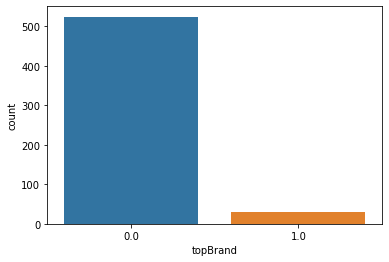

In [296]:
sns.countplot(x='topBrand', data=brands_df1)  

In [119]:
#brands_df1.to_csv(r'C:\Users\vihar\Desktop\Interview\WD\brands.csv')

#### Below data manipulation steps are performed on receipts data to make it more structured

In [297]:
receipts_df.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [299]:
receipts_df

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [300]:
Bvalue = {'$date': 0}
receipts_df['finishedDate']=receipts_df['finishedDate'].apply(lambda x: x if x == x else Bvalue)
receipts_df['pointsAwardedDate']=receipts_df['pointsAwardedDate'].apply(lambda x: x if x == x else Bvalue)
receipts_df['purchaseDate']=receipts_df['purchaseDate'].apply(lambda x: x if x == x else Bvalue)

rdf1 = receipts_df['_id'].apply(lambda x: pd.Series(*x.items()))
rdf1.columns = ['oid', 'id']

rdf2 = receipts_df['createDate'].apply(lambda x: pd.Series(*x.items()))
rdf2.columns = ['date1', 'createDate1']

rdf3 = receipts_df['dateScanned'].apply(lambda x: pd.Series(*x.items()))
rdf3.columns = ['date2', 'dateScanned1']

rdf4 = receipts_df['finishedDate'].apply(lambda x: pd.Series(*x.items()))
rdf4.columns = ['date3', 'finishedDate1']

rdf5 = receipts_df['modifyDate'].apply(lambda x: pd.Series(*x.items()))
rdf5.columns = ['date4', 'modifyDate1']

rdf6 = receipts_df['pointsAwardedDate'].apply(lambda x: pd.Series(*x.items()))
rdf6.columns = ['date5', 'pointsAwardedDate1']

rdf7 = receipts_df['purchaseDate'].apply(lambda x: pd.Series(*x.items()))
rdf7.columns = ['date6', 'purchaseDate1']

receipts_df1 = pd.concat([receipts_df,rdf1,rdf2,rdf3,rdf4,rdf5,rdf6,rdf7],axis=1)

receipts_df1.drop(['_id','createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate','oid','date1','date2','date3','date4','date5','date6'],axis=1,inplace=True)

In [301]:
for i in range((len(receipts_df1))):
    temp='/Date('+str(receipts_df1['createDate1'][i])+')/'
    MILLISECONDS = temp.split('(')[1][:-2]
    receipts_df1['createDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
            
for i in range((len(receipts_df1))):
               temp='/Date('+str(receipts_df1['dateScanned1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               receipts_df1['dateScanned1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
for i in range((len(receipts_df1))):
               temp='/Date('+str(receipts_df1['finishedDate1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               receipts_df1['finishedDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
            
for i in range((len(receipts_df1))):
               temp='/Date('+str(receipts_df1['modifyDate1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               receipts_df1['modifyDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
for i in range((len(receipts_df1))):
               temp='/Date('+str(receipts_df1['pointsAwardedDate1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               receipts_df1['pointsAwardedDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
                
            
for i in range((len(receipts_df1))):
               temp='/Date('+str(receipts_df1['purchaseDate1'][i])+')/'
               MILLISECONDS = temp.split('(')[1][:-2]
               receipts_df1['purchaseDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')

<ipython-input-301-8d648e64e61d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receipts_df1['createDate1'][i] = datetime.datetime.fromtimestamp(int(MILLISECONDS)/1000.0).strftime('%Y-%m-%d')
C:\Users\vihar\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-301-8d648e64e61d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r

In [302]:
receipts_df1

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id,createDate1,dateScanned1,finishedDate1,modifyDate1,pointsAwardedDate1,purchaseDate1
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
2,5.0,All-receipts receipt bonus,5.0,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03,2021-01-03,1969-12-31,2021-01-03,1969-12-31,2021-01-02
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,2020-08-16
1115,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,1969-12-31
1116,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,1969-12-31
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,2020-08-16


In [303]:
receipts_df2 = receipts_df1.drop(['rewardsReceiptItemList'],axis=1)

In [273]:
receipts_df2.to_csv(r'C:\Users\vihar\Desktop\Interview\WD\receipts1.csv')

In [304]:
receipts_df2

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,id,createDate1,dateScanned1,finishedDate1,modifyDate1,pointsAwardedDate1,purchaseDate1
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
2,5.0,All-receipts receipt bonus,5.0,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03,2021-01-03,1969-12-31,2021-01-03,1969-12-31,2021-01-02
3,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
4,5.0,All-receipts receipt bonus,5.0,2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,2020-08-16
1115,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,1969-12-31
1116,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,1969-12-31
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405,2021-03-01,2021-03-01,1969-12-31,2021-03-01,1969-12-31,2020-08-16


In [306]:
receipts_df1['rewardsReceiptItemList'][1]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '028400642255',
  'description': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'finalPrice': '10.00',
  'itemPrice': '10.00',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'pointsNotAwardedReason': 'Action not allowed for user and CPG',
  'pointsPayerId': '5332f5fbe4b03c9a25efd0ba',
  'preventTargetGapPoints': True,
  'quantityPurchased': 1,
  'rewardsGroup': 'DORITOS SPICY SWEET CHILI SINGLE SERVE',
  'rewardsProductPartnerId': '5332f5fbe4b03c9a25efd0ba',
  'userFlaggedBarcode': '028400642255',
  'userFlaggedDescription': 'DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCED FAT BAG 1 OZ',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '10.00',
  'userFlaggedQuantity': 1}]

In [233]:
receipt2=  receipts_df1[['rewardsReceiptItemList','id']]
receipt2

,rewardsReceiptItemList,id
0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",5ff1e1eb0a720f0523000575
1,"[{'barcode': '4011', 'description': 'ITEM NOT ...",5ff1e1bb0a720f052300056b
2,"[{'needsFetchReview': False, 'partnerItemId': ...",5ff1e1f10a720f052300057a
3,"[{'barcode': '4011', 'description': 'ITEM NOT ...",5ff1e1ee0a7214ada100056f
4,"[{'barcode': '4011', 'description': 'ITEM NOT ...",5ff1e1d20a7214ada1000561
...,...,...
1114,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",603cc0630a720fde100003e6
1115,NaN,603d0b710a720fde1000042a
1116,NaN,603cf5290a720fde10000413
1117,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",603ce7100a7217c72c000405


# DATE NULL VALUE IS STORED AS '1969-12-31' in DATASET. We can further manipulate it to 0 or keep this filter whenever quering from the dataset.